 Lab Sheet 5 - Pandas and Dataframes
================================

#### This week you will be trying different things with the Pandas library.  In each case, feel free to add cells - and see what is in the dataframe. The goal is to understand and get used to using dataframes.

#### First, import the necessary libraries.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### We will be working with two datasets:
- A list of results from the FIFA World Cup in 2018 - **Fifa2018.csv**
- Measures of happiness for different countries - **Happiness2017.csv**

#### FIFA

1.) Use the _read_csv()_ function the dataset into a dataframe called Fifa.

In [2]:
Fifa = pd.read_csv('Fifa2018.csv')

Use _.head()_, _.tail()_, and _.columns_ to look at the dataframe. 
- How many columns does it have? 
- How many rows?

In [3]:
Fifa.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [4]:
Fifa.tail()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,Yes,18.0,Final,No,0,1.0,18.0
127,15-07-2018,Croatia,France,2,61,15,3,8,4,6,...,1,0,0,No,28.0,Final,No,0,NaN,NaN


In [5]:
Fifa.columns
# The dataset has 128 columns and 27 rows

Index(['Date', 'Team', 'Opponent', 'Goal Scored', 'Ball Possession %',
       'Attempts', 'On-Target', 'Off-Target', 'Blocked', 'Corners', 'Offsides',
       'Free Kicks', 'Saves', 'Pass Accuracy %', 'Passes',
       'Distance Covered (Kms)', 'Fouls Committed', 'Yellow Card',
       'Yellow & Red', 'Red', 'Man of the Match', '1st Goal', 'Round', 'PSO',
       'Goals in PSO', 'Own goals', 'Own goal Time'],
      dtype='object')

2.) **First plots:** Create a histogram of the goals scored in a game:
- calling the command from the dataframe
- using matplotlib

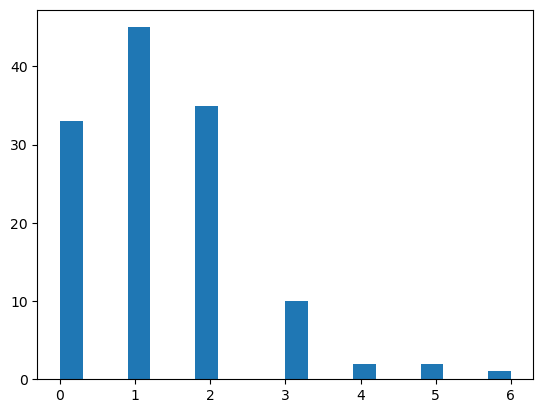

In [6]:
Fifa['Goal Scored'].hist(bins = 20)
plt.grid()

Text(0, 0.5, 'Number of games')

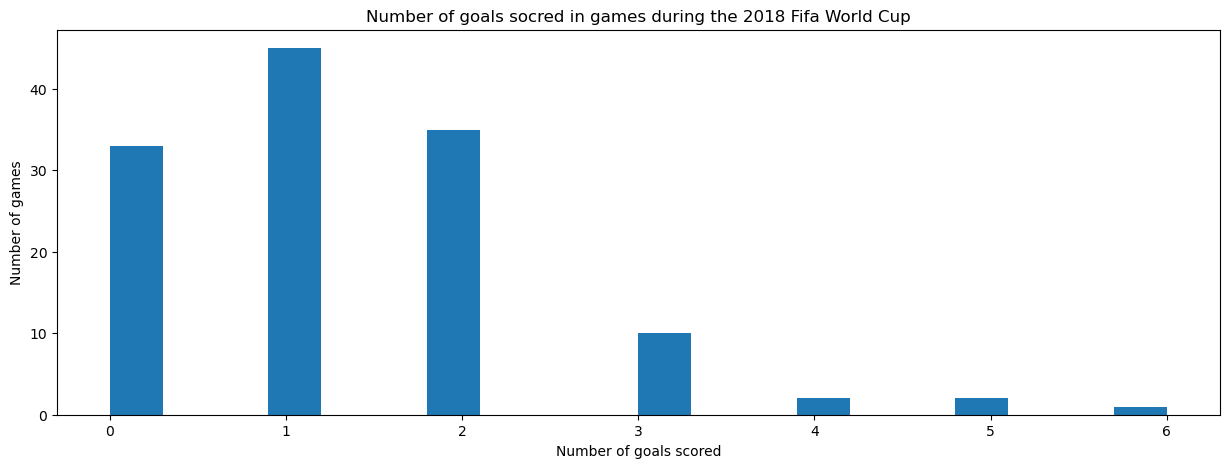

In [7]:
fig, ax = plt.subplots(1,1, figsize = (15,5))
ax.hist(Fifa['Goal Scored'], bins = 20)
ax.set_title("Number of goals socred in games during the 2018 Fifa World Cup")
ax.set_xlabel("Number of goals scored")
ax.set_ylabel("Number of games")

3.) **Getting used to indexing:** Here the goal is to get used to different ways of indexing (there is more below)
- What is the date of 5th game? (here the 5th game in the list is meant, not by date) 
- What is the date of England's 3rd game (as the home team)?  (here the 3rd game in the list is meant, not by date) 

In [26]:
# .iloc is used to focus on a specific row
# .loc is used for filtering e.g. how many games had more than 3 goals 
print(Fifa['Date'].head())
print(Fifa['Date'].iloc[4])

0    14-06-2018
1    14-06-2018
2    15-06-2018
3    15-06-2018
4    15-06-2018
Name: Date, dtype: object
15-06-2018


In [22]:
#two different ways here
#sub_Fifa = Fifa[Fifa['Team'] == 'England']
#sub_dates = sub_Fifa['Date']
#print(sub_dates.iloc[2])

#England = Fifa[Fifa['Team'] == 'England']
#England['Date'].iloc[2]
print(Fifa[Fifa['Team']=='England']['Date'])
print(Fifa[Fifa['Team']=='England']['Date'].iloc[2])


27     18-06-2018
58     24-06-2018
94     28-06-2018
111    03-07-2018
117    07-07-2018
123    11-07-2018
125    14-07-2018
Name: Date, dtype: object
28-06-2018


4.) **Cleaning up the dataframe:** While powerful, there can be values which cannot be read. 
- Use the _isnull()_ function called from the dataframe, to see if all values are defined?
- Combine it with the _any()_ function to see if which columns (if any) have undefined values. 

In [10]:
Fifa.isnull()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
124,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
125,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,True
126,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
Fifa.isnull().any()

Date                      False
Team                      False
Opponent                  False
Goal Scored               False
Ball Possession %         False
Attempts                  False
On-Target                 False
Off-Target                False
Blocked                   False
Corners                   False
Offsides                  False
Free Kicks                False
Saves                     False
Pass Accuracy %           False
Passes                    False
Distance Covered (Kms)    False
Fouls Committed           False
Yellow Card               False
Yellow & Red              False
Red                       False
Man of the Match          False
1st Goal                   True
Round                     False
PSO                       False
Goals in PSO              False
Own goals                  True
Own goal Time              True
dtype: bool

In [27]:
Fifa.isnull().any().any()

True

5.) Create a new variable called Fifa_test using _pd.DataFrame()_ making sure to set _copy=True_. 
- Use the function _.fillna()_ to set all undefined values to 0 (in Fifa_test). Verify that there are now no undefined values. 
- Notice that this sets all the NaN values to 0 - while this makes sense to have different values for different columns.  Going back to the variable Fifa. 
    *  For each of the columns with undefined values find the minimum and maximum values  **Hint:** use _.min()_ and _.max()_
    * For quantities where none occurred, e.g. goals, own goals, etc. set the undefined values to 0
    * For quantities which describe a time of an event which did not occur, e.g. 1st goal, set it to a value greater than the maximum of that column. 
    * Verify that all values are defined.

In [28]:
Fifa_test = pd.DataFrame(data = Fifa, copy = True)
Fifa_test.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [32]:
Fifa_test.fillna(0)
Fifa_test.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


In [33]:
Fifa_test = Fifa_test.fillna(0)
Fifa_test.isnull().any().any()

False

5.) Create a new variable called Fifa_test using _pd.DataFrame()_ making sure to set _copy=True_. 
- Use the function _.fillna()_ to set all undefined values to 0 (in Fifa_test). Verify that there are now no undefined values. 
- Notice that this sets all the NaN values to 0 - while this makes sense to have different values for different columns.  Going back to the variable Fifa. 
    *  For each of the columns with undefined values find the minimum and maximum values  **Hint:** use _.min()_ and _.max()_
    * For quantities where none occurred, e.g. goals, own goals, etc. set the undefined values to 0
    * For quantities which describe a time of an event which did not occur, e.g. 1st goal, set it to a value greater than the maximum of that column. 
    * Verify that all values are defined.

In [34]:
print('1st Goal Min and Max Values')
print(Fifa['1st Goal'].min())
print(Fifa['1st Goal'].max())
print('----------------------------')
print('Own Goals Min and Max Values')
print(Fifa['Own goals'].min())
print(Fifa['Own goals'].max())
print('----------------------------')
print('Own Goal Time Min and Max Values')
print(Fifa['Own goal Time'].min())
print(Fifa['Own goal Time'].max())



1st Goal Min and Max Values
1.0
90.0
----------------------------
Own Goals Min and Max Values
1.0
1.0
----------------------------
Own Goal Time Min and Max Values
12.0
90.0


In [40]:
Fifa['Own goals'] = Fifa['Own goals'].fillna(0)
Fifa['1st Goal'] = Fifa['1st Goal'].fillna(150)
Fifa['Own goal Time'] = Fifa['Own goal Time'].fillna(150)

In [17]:
Fifa['1st Goal'].fillna('100')
Fifa['Own goal Time'].fillna('100')

0       100
1       100
2       100
3       100
4      90.0
       ... 
123     100
124     100
125     100
126    18.0
127     100
Name: Own goal Time, Length: 128, dtype: object

In [41]:
Fifa.isnull().any().any()

False

6.) **Types and indices:** 
- Check the types using Dataframe.dtypes  - note that it is not a function (no parenthesis or brackets)
- Use pandas.to_datetime(Series) to specify that the Date column is a date. 
    - Note that it is called from pandas or pd
    - Make sure you overwrite the existing column (alternatively first call just the function and check dtypes again)
- Use the function _.set_index()_ to make the Date column the index. Use _.head()_ to verify that it worked. If the date column is not in bold then it did not (**Hint:** what did you have to do to change the data type above?) 

In [18]:
Fifa.dtypes

Date                       object
Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object

In [43]:
Fifa['Date'] = pd.to_datetime(Fifa['Date'])
Fifa.dtypes

C:\Users\dmsta\AppData\Local\Temp\ipykernel_27996\3103358213.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Fifa['Date'] = pd.to_datetime(Fifa['Date'])


Date                      datetime64[ns]
Team                              object
Opponent                          object
Goal Scored                        int64
Ball Possession %                  int64
Attempts                           int64
On-Target                          int64
Off-Target                         int64
Blocked                            int64
Corners                            int64
Offsides                           int64
Free Kicks                         int64
Saves                              int64
Pass Accuracy %                    int64
Passes                             int64
Distance Covered (Kms)             int64
Fouls Committed                    int64
Yellow Card                        int64
Yellow & Red                       int64
Red                                int64
Man of the Match                  object
1st Goal                         float64
Round                             object
PSO                               object
Goals in PSO    

In [47]:
Fifa = Fifa.set_index('Date')
Fifa.head()

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-14,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,...,0,0,0,Yes,12.0,Group Stage,No,0,0.0,150.0
2018-06-14,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,...,0,0,0,No,150.0,Group Stage,No,0,0.0,150.0
2018-06-15,Egypt,Uruguay,0,43,8,3,3,2,0,1,...,2,0,0,No,150.0,Group Stage,No,0,0.0,150.0
2018-06-15,Uruguay,Egypt,1,57,14,4,6,4,5,1,...,0,0,0,Yes,89.0,Group Stage,No,0,0.0,150.0
2018-06-15,Morocco,Iran,0,64,13,3,6,4,5,0,...,1,0,0,No,150.0,Group Stage,No,0,1.0,90.0


7.) List all the rows which occurred in June (using _.loc()_)
- Use a range of dates in the same format as in the dataframe. You can use strings. So it would be 
        string1 : string2 
  where string1 is a string representing the start date and the string2 is a string representing the end date. (Here you may get a warning that the dates are out of order - you can fix this using the function _sort_index()_)
- Try a different range - is it inclusive (i.e. is the end date included?)
- Try indexing with 'June 2018'
- Try different formats of dates to see what works and what does not.

In [58]:
Fifa.loc['2018-06-01':'2018-06-30']

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-14,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,...,0,0,0,Yes,12.0,Group Stage,No,0,0.0,150.0
2018-06-14,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,...,0,0,0,No,150.0,Group Stage,No,0,0.0,150.0
2018-06-15,Egypt,Uruguay,0,43,8,3,3,2,0,1,...,2,0,0,No,150.0,Group Stage,No,0,0.0,150.0
2018-06-15,Uruguay,Egypt,1,57,14,4,6,4,5,1,...,0,0,0,Yes,89.0,Group Stage,No,0,0.0,150.0
2018-06-15,Morocco,Iran,0,64,13,3,6,4,5,0,...,1,0,0,No,150.0,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-28,Belgium,England,1,52,15,4,4,7,2,1,...,2,0,0,Yes,51.0,Group Stage,No,0,0.0,150.0
2018-06-30,France,Argentina,4,41,9,4,4,1,0,0,...,3,0,0,Yes,13.0,Round of 16,No,0,0.0,150.0
2018-06-30,Argentina,France,3,59,9,4,1,4,4,1,...,5,0,0,No,41.0,Round of 16,No,0,0.0,150.0


In [50]:
Fifa.loc['2018-06-14':'2018-06-15']

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-14,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,...,0,0,0,Yes,12.0,Group Stage,No,0,0.0,150.0
2018-06-14,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,...,0,0,0,No,150.0,Group Stage,No,0,0.0,150.0
2018-06-15,Egypt,Uruguay,0,43,8,3,3,2,0,1,...,2,0,0,No,150.0,Group Stage,No,0,0.0,150.0
2018-06-15,Uruguay,Egypt,1,57,14,4,6,4,5,1,...,0,0,0,Yes,89.0,Group Stage,No,0,0.0,150.0
2018-06-15,Morocco,Iran,0,64,13,3,6,4,5,0,...,1,0,0,No,150.0,Group Stage,No,0,1.0,90.0
2018-06-15,Iran,Morocco,1,36,8,2,5,1,2,0,...,3,0,0,Yes,90.0,Group Stage,No,0,0.0,150.0
2018-06-15,Portugal,Spain,3,39,8,3,2,3,4,1,...,1,0,0,No,4.0,Group Stage,No,0,0.0,150.0
2018-06-15,Spain,Portugal,3,61,12,5,5,2,5,3,...,1,0,0,Yes,24.0,Group Stage,No,0,0.0,150.0


In [51]:
Fifa.loc['June 2018']

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-14,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,...,0,0,0,Yes,12.0,Group Stage,No,0,0.0,150.0
2018-06-14,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,...,0,0,0,No,150.0,Group Stage,No,0,0.0,150.0
2018-06-15,Egypt,Uruguay,0,43,8,3,3,2,0,1,...,2,0,0,No,150.0,Group Stage,No,0,0.0,150.0
2018-06-15,Uruguay,Egypt,1,57,14,4,6,4,5,1,...,0,0,0,Yes,89.0,Group Stage,No,0,0.0,150.0
2018-06-15,Morocco,Iran,0,64,13,3,6,4,5,0,...,1,0,0,No,150.0,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-28,Belgium,England,1,52,15,4,4,7,2,1,...,2,0,0,Yes,51.0,Group Stage,No,0,0.0,150.0
2018-06-30,France,Argentina,4,41,9,4,4,1,0,0,...,3,0,0,Yes,13.0,Round of 16,No,0,0.0,150.0
2018-06-30,Argentina,France,3,59,9,4,1,4,4,1,...,5,0,0,No,41.0,Round of 16,No,0,0.0,150.0


In [56]:
Fifa.loc['14th July 2018']

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-14,Belgium,England,2,43,12,4,3,5,4,1,...,1,0,0,Yes,4.0,3rd Place,No,0,0.0,150.0
2018-07-14,England,Belgium,0,57,15,5,7,3,5,0,...,2,0,0,No,150.0,3rd Place,No,0,0.0,150.0


* Find which rounds occurred in June

In [68]:
print(Fifa['Round'].loc['June 2018'].unique())

['Group Stage' 'Round of 16']


8.) **Plotting**: Try to use the pandas plotting directly.
- Plot a histogram of ball possession percentages in June (**Hint:** Use _density=True_ to normalise the histograms)
- Plot separate histograms of ball possession percentages of Japan and England. **Hints:** If you use logical expressions, the individual terms should be in parenthesis and you need to you the element-wise logical expressions  **&**,**|**,**!** (rather than **and**, **or**,  **not**). For example,
                 (x<0.75) & (x>0.25)
for x between 1/4 and 3/4.
- Plot a  histogram of ball possession percentages of England in June


<Axes: >

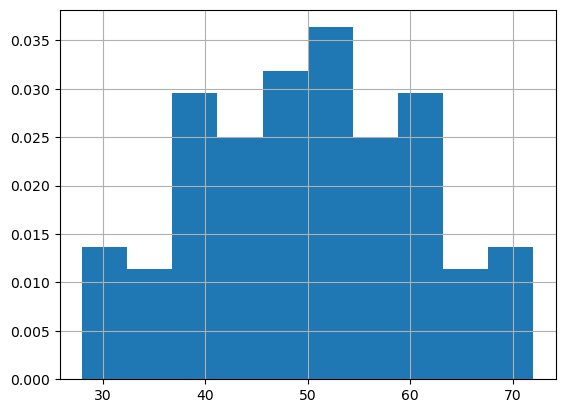

In [86]:
Fifa.loc['June 2018']['Ball Possession %'].hist(density = True)

<Axes: >

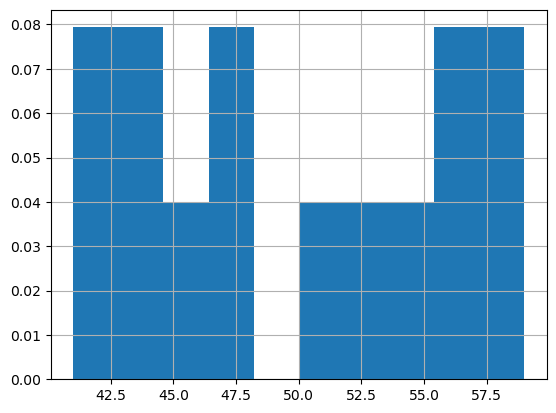

In [87]:
Fifa.loc[(Fifa['Team']== 'England') | (Fifa['Opponent']== 'England')]['Ball Possession %'].hist(density = True)

<Axes: >

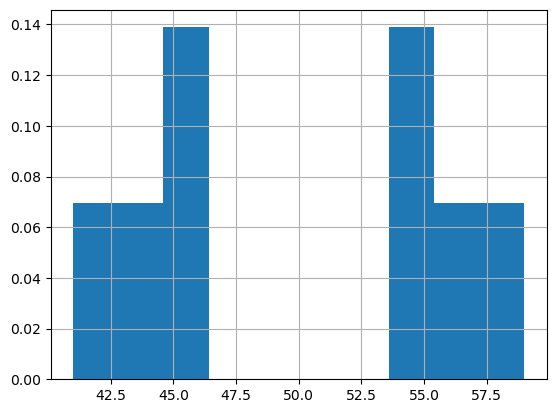

In [88]:
Fifa.loc[(Fifa['Team']== 'Japan') | (Fifa['Opponent']== 'Japan')]['Ball Possession %'].hist(density = True)

<Axes: >

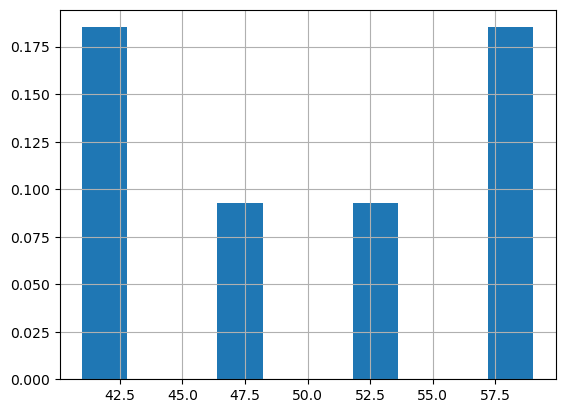

In [84]:
Fifa.loc[(Fifa['Team']== 'England') | (Fifa['Opponent']== 'England')].loc['June 2018']['Ball Possession %'].hist(density = True)

9.) **Groupby**
- Use _groupby()_ to find the mean of Passes by Round
- Plot the normalised histograms of goals scored in one plot by round (**Hint:** _alpha=_ will be useful since they overlap)
- Repeat both but only for France as the away team (**Hint:** You can use multiple commands)

In [95]:
Fifa.groupby('Round')['Passes'].mean()

Round
3rd Place         604.000000
Final             409.000000
Group Stage       448.989583
Quarter Finals    478.625000
Round of 16       511.812500
Semi- Finals      518.000000
Name: Passes, dtype: float64

Round
3rd Place         Axes(0.125,0.11;0.775x0.77)
Final             Axes(0.125,0.11;0.775x0.77)
Group Stage       Axes(0.125,0.11;0.775x0.77)
Quarter Finals    Axes(0.125,0.11;0.775x0.77)
Round of 16       Axes(0.125,0.11;0.775x0.77)
Semi- Finals      Axes(0.125,0.11;0.775x0.77)
Name: Goal Scored, dtype: object

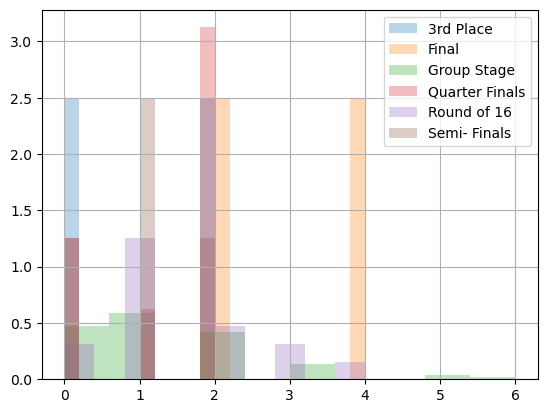

In [96]:
Fifa.groupby('Round')['Goal Scored'].hist(density = True, alpha = 0.3, legend = True)

Round
Final             Axes(0.125,0.11;0.775x0.77)
Group Stage       Axes(0.125,0.11;0.775x0.77)
Quarter Finals    Axes(0.125,0.11;0.775x0.77)
Round of 16       Axes(0.125,0.11;0.775x0.77)
Semi- Finals      Axes(0.125,0.11;0.775x0.77)
Name: Goal Scored, dtype: object

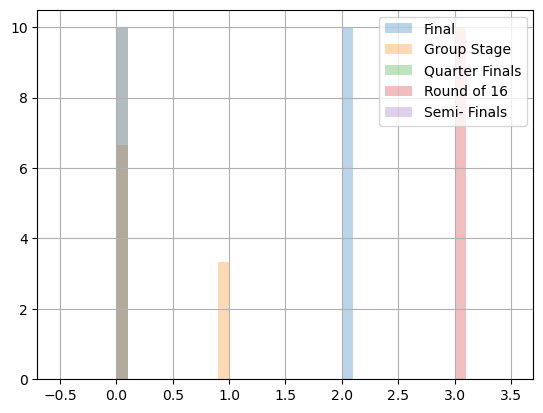

In [100]:
France = Fifa[Fifa['Opponent']== 'France']
France.groupby('Round')['Passes'].mean()
France.groupby('Round')['Goal Scored'].hist(density = True, alpha = 0.3, legend = True)

####  Happiness

1.) Use the _read_csv()_ function the dataset into a dataframe called Happy and look at head, tail, columns, etc.

In [103]:
Happy = pd.read_csv('Happiness2017.csv')
Happy

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


2.) Rename the column which has the Economy GDP per Capita to 'GDPperCapita'

**Hint:** Use the function: 
 
 _rename(columns={oldname : newname}, inplace=True)_)

In [105]:
Happy.rename(columns = {'Economy..GDP.per.Capita.' : 'GDPperCapita'}, inplace = True)
Happy

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,GDPperCapita,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


3.) **Plotting**:
- Using _plt.scatter()_ make a scatter plot of GDP per Capita vs. the happiness score.
- Repeat by calling plot from the dataframe (**Hint**: Set kind to scatter)
- Plot a scatter plot for GDP per Capita vs Health/Life Expectancy for countries who have a Freedom score greater than 1/2


Text(0, 0.5, 'Happiness Score')

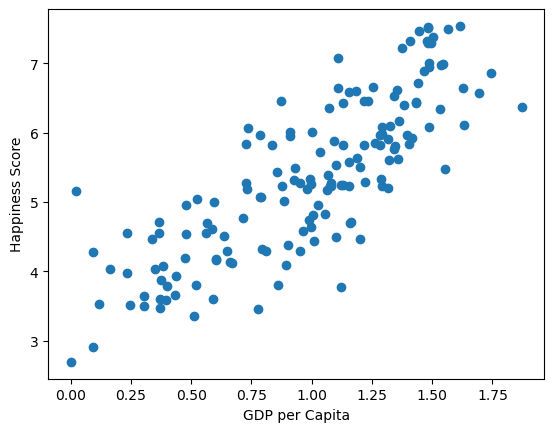

In [109]:
plt.scatter(Happy['GDPperCapita'],Happy['Happiness.Score'])
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')

<Axes: xlabel='GDPperCapita', ylabel='Happiness.Score'>

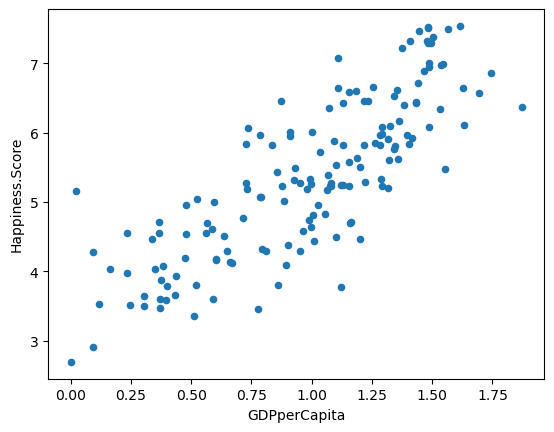

In [118]:
Happy.plot(x='GDPperCapita',y='Happiness.Score', kind = 'scatter')

<Axes: xlabel='GDPperCapita', ylabel='Health..Life.Expectancy.'>

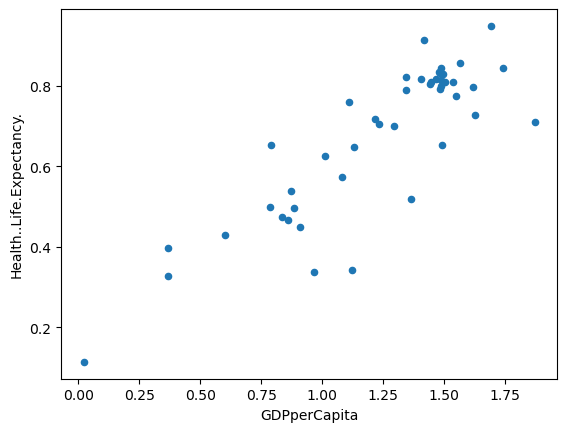

In [119]:
Happy[Happy['Freedom'] > 0.5].plot(x='GDPperCapita',y='Health..Life.Expectancy.', kind = 'scatter')

4.) **More Plotting**
- Create a line plot for Happiness rank vs Generosity
- Create a line plot for Happiness rank vs Happiness score 
- Is it linear?


<Axes: xlabel='Happiness.Rank'>

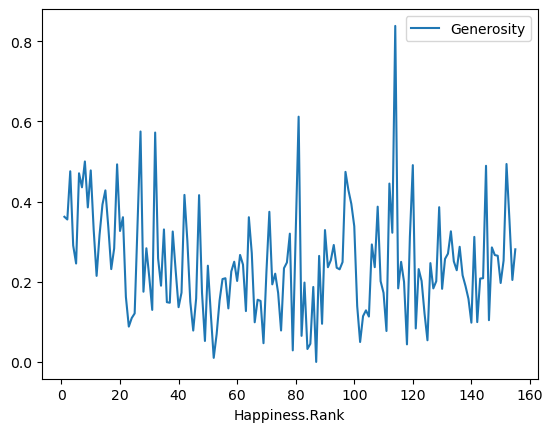

In [120]:
Happy.plot(x='Happiness.Rank',y='Generosity')

<Axes: xlabel='Happiness.Rank'>

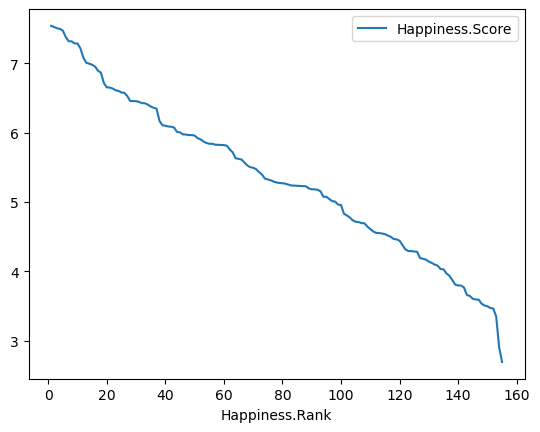

In [121]:
Happy.plot(x='Happiness.Rank',y='Happiness.Score')

5.) **Useful Trick: Using groupby for numerical values**
- Call _pandas.cut(Series,bins=)_ on Health/Life Expectancy with 5 bins. This creates a Series with each element representing which interval it falls into.
- Append it to the Happy dataframe in a column named percentile **Hint:** This is done the same way as for a new element to a dictionary 
                dataframe['columnname'] = series
- Use _groupby_ to plot the histograms of the Family index by the Health bins. 

In [136]:
Happy = pd.read_csv('Happiness2017.csv')
pd.cut(Happy['Health..Life.Expectancy.'], bins = 5)

0          (0.76, 0.949]
1          (0.76, 0.949]
2          (0.76, 0.949]
3          (0.76, 0.949]
4          (0.76, 0.949]
             ...        
150         (0.19, 0.38]
151         (0.38, 0.57]
152         (0.19, 0.38]
153    (-0.000949, 0.19]
154    (-0.000949, 0.19]
Name: Health..Life.Expectancy., Length: 155, dtype: category
Categories (5, interval[float64, right]): [(-0.000949, 0.19] < (0.19, 0.38] < (0.38, 0.57] < (0.57, 0.76] < (0.76, 0.949]]

In [137]:
Happy['percentile'] = pd.cut(Happy['Health..Life.Expectancy.'], bins = 5)

C:\Users\dmsta\AppData\Local\Temp\ipykernel_27996\2692317004.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Happy.groupby('percentile')['Family'].hist(alpha = 0.2, legend = True)


percentile
(-0.000949, 0.19]    Axes(0.125,0.11;0.775x0.77)
(0.19, 0.38]         Axes(0.125,0.11;0.775x0.77)
(0.38, 0.57]         Axes(0.125,0.11;0.775x0.77)
(0.57, 0.76]         Axes(0.125,0.11;0.775x0.77)
(0.76, 0.949]        Axes(0.125,0.11;0.775x0.77)
Name: Family, dtype: object

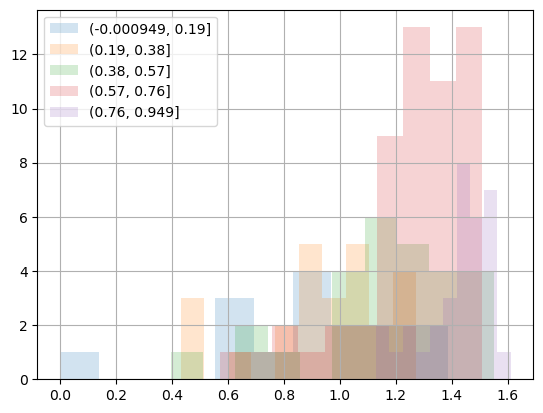

In [141]:
Happy.groupby('percentile')['Family'].hist(alpha = 0.2, legend = True)

Play around more with the datasets.  Some things to try include. 
- Practice indexing using _.loc[]_ and _.iloc[]_
- When is the indexing inclusive, when is it not
- Access multiple columns 
- Try to create new plots